# Movie Story #

## Movies vs Occupation ##

## All the import we need ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing datafiles ##

In [2]:
df = pd.read_csv('/home/user/Downloads/ml-100k/u.user', 
            names = ['user id', 'age', 'gender', 'occupation', 'zip code'], sep='|', header=None)
df1 = pd.read_csv('/home/user/Downloads/ml-100k/u.data', 
            names = ['user id', 'movie id', 'rating', 'timestamp'], sep='\t', header=None)
df2 = pd.read_csv('/home/user/Downloads/ml-100k/u.item', 
             names = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown',
                      'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
                      'Fantasy', 'Film Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi', 'Thriller',
                      'War', 'Western'], sep='|', header = None, encoding = "ISO-8859-1")

# Movies whose rating greater than 3 ##

In [3]:
worth_to_watch = df1[df1['rating'] >= 3]
#worth_to_watch.head()

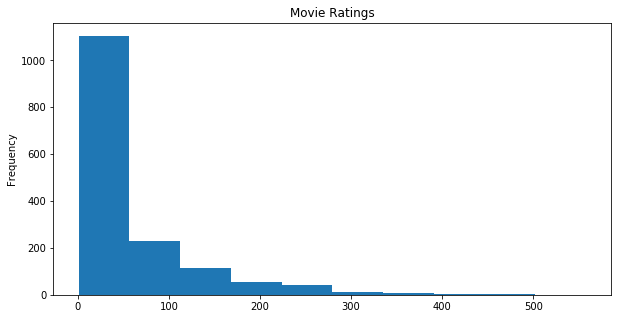

In [4]:
worth_to_watch.groupby(['movie id']).rating.count().plot(kind = 'hist', title = 'Movie Ratings', figsize = (10,5))

In [ ]:
# In this graph we can easily see that people with movie ID less than 60 watched by many peoples.

# Movie vs Occupation #

### count of movies on the basis of occuaption ###

In [5]:
gene = df.groupby(['occupation']).gender.count().sort_values(ascending = False)

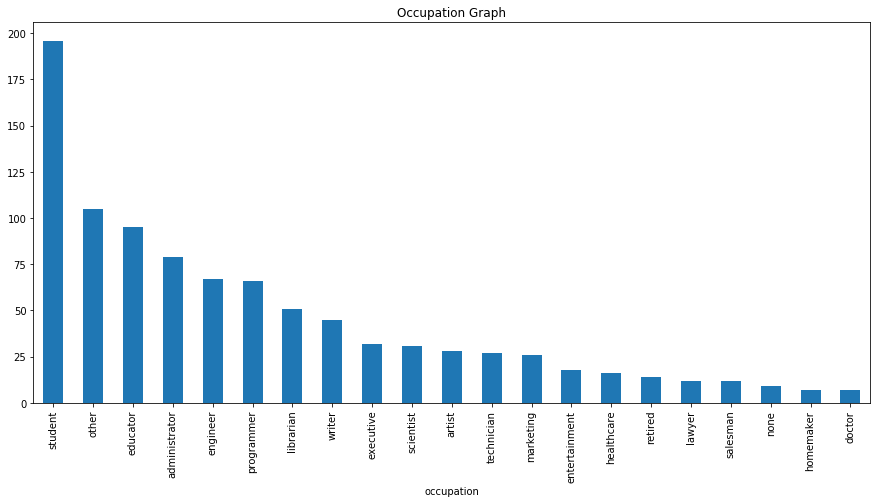

In [7]:
gene.plot(kind = 'bar', stacked = False, title = 'Occupation Graph', figsize = (15,7))

In [ ]:
#From the above graph we can easily see that the Students watch more movies and Doctors less

### Stacked bar chart of genre on the basis of Occupation to check what types(genre) of movies watched by people on the basis of occupation ###

In [8]:
mer = df.merge(df1)
merg = mer.merge(df2)
#merg.head()

In [9]:
merge_new = merg.drop(['gender', 'zip code', 'timestamp', 'user id', 'movie title', 'movie id',
                       'rating', 'video release date', 'IMDb URL', 'unknown'], axis = 1)
merge1 = merge_new.sort_values('release date')
#merge1['year'] = merge1['release date']

In [62]:
occupation_genre_df = merge1.groupby(['occupation']).sum().drop(['age'], axis = 1)
#occupation_genre_df.head()


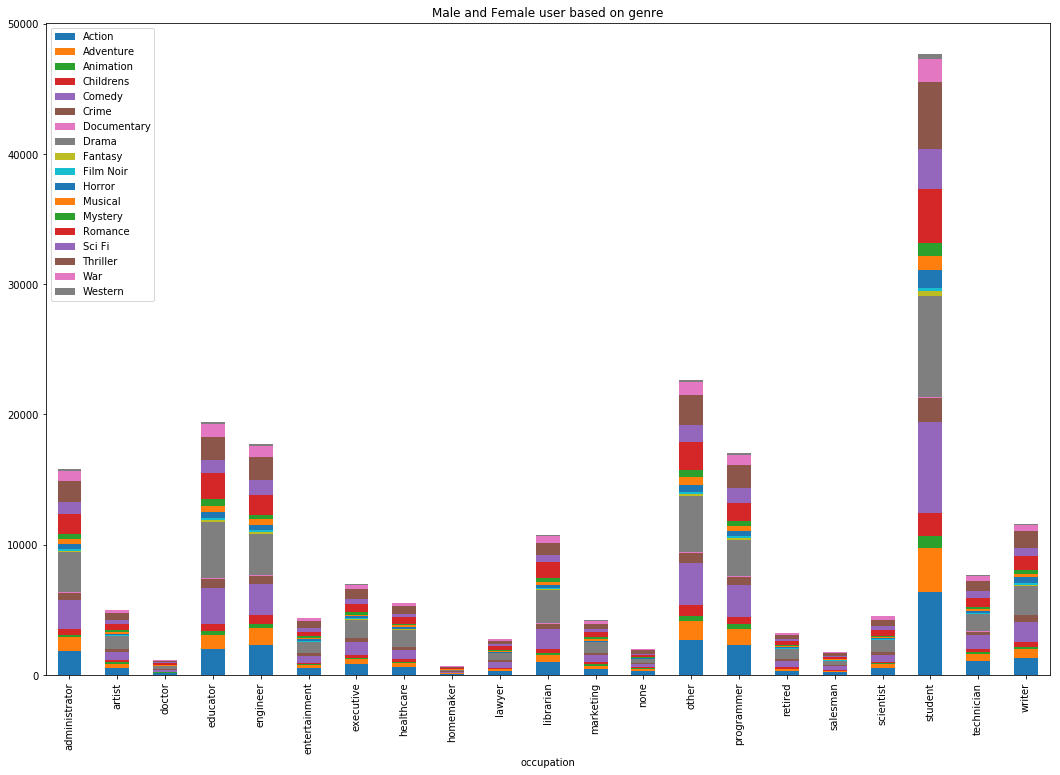

In [11]:
occupation_genre_df.plot(kind = 'bar', stacked = True, title ='Male and Female user based on genre',
                         figsize = (18,12))

In [ ]:
# From the above graph we can analyse that the Students watch more movies and people mostly watch Drama,Comedy and Action movies.


In [14]:
occupation_genre_df.index.name = None
occupation_genre_df.index.name = 'occupation'
occupation_genre_df.reset_index(inplace = True)

In [15]:
artist = occupation_genre_df[occupation_genre_df.occupation == 'artist']
doctor = occupation_genre_df[occupation_genre_df.occupation == 'doctor']
homemaker = occupation_genre_df[occupation_genre_df.occupation == 'homemaker']
lawyer = occupation_genre_df[occupation_genre_df.occupation == 'lawyer']
salesman = occupation_genre_df[occupation_genre_df.occupation == 'salesman']
scientist = occupation_genre_df[occupation_genre_df.occupation == 'scientist']

In [60]:
analysis_df = pd.concat([artist, doctor, homemaker, lawyer, salesman, scientist], ignore_index = True)

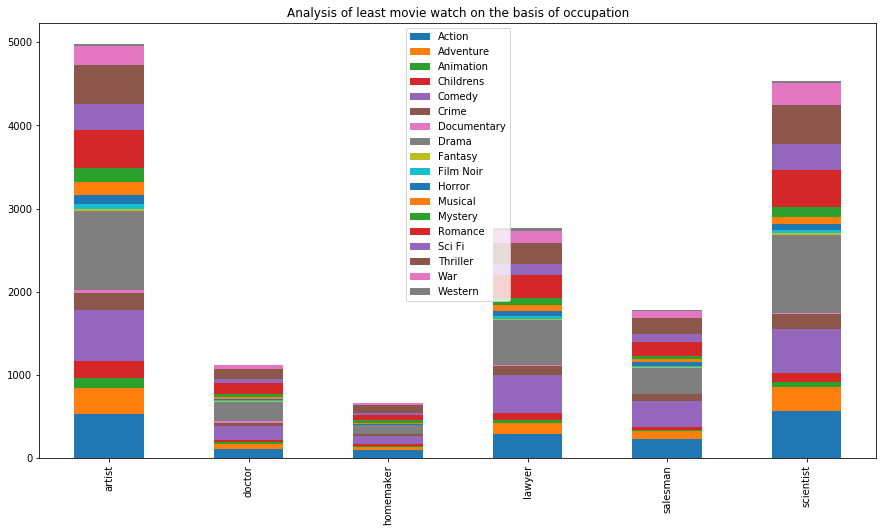

In [61]:
plot_ax = analysis_df.plot(kind = 'bar', stacked = True, 
                           title = 'Analysis of least movie watch on the basis of occupation', figsize = (15,8))
plot_ax.set_xticklabels(analysis_df.occupation)

In [ ]:
# in the above graph I am getting the same result as 
#previous(people prefer to watch Drama movies as compared to others)